In [1]:
import pandas as pd

df=pd.read_csv('loan_approved.csv')
m=df['ApplicantIncome'].mean()
n=df['ApplicantIncome'].std()
print(m)
print(n)
print(df.head())
z1=(5849-m)/n
print(z1)
z2=(4583-m)/n
print(z2)
z3=(3000-m)/n
print(z3)
z4=(2583-m)/n
print(z4)
z5=(6000-m)/n
print(z5)
m1=df['ApplicantIncome'].max()
m2=df['ApplicantIncome'].min()
print(m1)
print(m2)

5403.459283387622
6109.041673387174
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status (Approved)  
0             1.0         Urban                      Y  
1       

In [2]:
import pandas as pd
from scipy.stats import skew, kurtosis

df = pd.read_csv("loan_approved.csv")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

skew_min, skew_max = -1, 1
kurt_min, kurt_max = 2, 4   


for col in num_cols:
    col_skew = skew(df[col].dropna())
    col_kurt = kurtosis(df[col].dropna(), fisher=False)

    skew_status = "NORMAL" if skew_min <= col_skew <= skew_max else "NOT NORMAL"
    kurt_status = "NORMAL" if kurt_min <= col_kurt <= kurt_max else "NOT NORMAL"
    
    print(f"{col}: Skewness={col_skew:.3f} --> {skew_status}, "
          f"Kurtosis={col_kurt:.3f} --> {kurt_status}")


ApplicantIncome: Skewness=6.524 --> NOT NORMAL, Kurtosis=63.039 --> NOT NORMAL
CoapplicantIncome: Skewness=7.473 --> NOT NORMAL, Kurtosis=87.256 --> NOT NORMAL
LoanAmount: Skewness=2.671 --> NOT NORMAL, Kurtosis=13.304 --> NOT NORMAL
Loan_Amount_Term: Skewness=-2.357 --> NOT NORMAL, Kurtosis=9.608 --> NOT NORMAL
Credit_History: Skewness=-1.877 --> NOT NORMAL, Kurtosis=4.524 --> NOT NORMAL


### One Hot Encoding

In [3]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [4]:
df['Property_Area'].isna().sum()

np.int64(0)

In [5]:
df['Property_Area'].shape

(614,)

In [6]:
pd.get_dummies(df['Property_Area'],dtype=int,prefix='PA',drop_first='True')

,PA_Semiurban,PA_Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df1 = pd.get_dummies(df['Property_Area'],prefix='Property_Area',drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Property_Area'],axis=1)

In [8]:
df1 = pd.get_dummies(df['Gender'],prefix='G',drop_first=True)
df = pd.concat([df,df1],axis=1).drop(['Gender'],axis=1)

In [9]:
df1 = pd.get_dummies(df['Married'],prefix='G',drop_first=True)
df = pd.concat([df,df1],axis=1).drop(['Married'],axis=1)

In [10]:
df1 = pd.get_dummies(df['Self_Employed'],prefix='SE',drop_first=True)
df = pd.concat([df,df1],axis=1).drop(['Self_Employed'],axis=1)

In [11]:
df

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,G_Male,G_Yes,SE_Yes
0,LP001002,0,Graduate,5849,0.0,NaN,360.0,1.0,Y,False,True,True,False,False
1,LP001003,1,Graduate,4583,1508.0,128.0,360.0,1.0,N,False,False,True,True,False
2,LP001005,0,Graduate,3000,0.0,66.0,360.0,1.0,Y,False,True,True,True,True
3,LP001006,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Y,False,True,True,True,False
4,LP001008,0,Graduate,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,2900,0.0,71.0,360.0,1.0,Y,False,False,False,False,False
610,LP002979,3+,Graduate,4106,0.0,40.0,180.0,1.0,Y,False,False,True,True,False
611,LP002983,1,Graduate,8072,240.0,253.0,360.0,1.0,Y,False,True,True,True,False
612,LP002984,2,Graduate,7583,0.0,187.0,360.0,1.0,Y,False,True,True,True,False


In [12]:
df1 = pd.get_dummies(df['Loan_Status (Approved)'],prefix='LS',drop_first=True)
df = pd.concat([df,df1],axis=1).drop(['Loan_Status (Approved)'],axis=1)

In [13]:
df1 = pd.get_dummies(df['Education'],prefix='Ed',drop_first=True)
df = pd.concat([df,df1],axis=1).drop(['Education'],axis=1)

In [34]:
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,G_Male,G_Yes,SE_Yes,LS_Y,Ed_Not Graduate
0,LP001002,0,5849,0.0,NaN,360.0,1.0,False,True,True,False,False,True,False
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,False,False,True,True,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,False,True,True,True,True,True,False
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,False,True,True,True,False,True,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,True,False
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,False,False,True,True,False,True,False
611,LP002983,1,8072,240.0,253.0,360.0,1.0,False,True,True,True,False,True,False
612,LP002984,2,7583,0.0,187.0,360.0,1.0,False,True,True,True,False,True,False


In [35]:
df1 = pd.get_dummies(df['Dependents'],prefix='Dep',drop_first=True)
df = pd.concat([df,df1],axis=1).drop(['Dependents'],axis=1)

In [14]:
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,G_Male,G_Yes,SE_Yes,LS_Y,Ed_Not Graduate
0,LP001002,0,5849,0.0,NaN,360.0,1.0,False,True,True,False,False,True,False
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,False,False,True,True,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,False,True,True,True,True,True,False
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,False,True,True,True,False,True,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,True,False
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,False,False,True,True,False,True,False
611,LP002983,1,8072,240.0,253.0,360.0,1.0,False,True,True,True,False,True,False
612,LP002984,2,7583,0.0,187.0,360.0,1.0,False,True,True,True,False,True,False


In [15]:
df['LoanAmount'].kurtosis()

np.float64(10.40153349029416)

In [16]:
df['LoanAmount'].skew()

np.float64(2.677551679256059)

In [17]:
print("Missing values before cleaning:")
print(df.isnull().sum())


numeric_cols = ['LoanAmount','Loan_Amount_Term']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


print("\nMissing values after cleaning:")
print(df.isnull().sum())

df.head()

Missing values before cleaning:
Loan_ID                     0
Dependents                 15
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area_Semiurban     0
Property_Area_Urban         0
G_Male                      0
G_Yes                       0
SE_Yes                      0
LS_Y                        0
Ed_Not Graduate             0
dtype: int64

Missing values after cleaning:
Loan_ID                     0
Dependents                 15
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             50
Property_Area_Semiurban     0
Property_Area_Urban         0
G_Male                      0
G_Yes                       0
SE_Yes                      0
LS_Y                        0
Ed_Not Graduate             0
dtype: int64


,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,G_Male,G_Yes,SE_Yes,LS_Y,Ed_Not Graduate
0,LP001002,0,5849,0.0,128.0,360.0,1.0,False,True,True,False,False,True,False
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,False,False,True,True,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,False,True,True,True,True,True,False
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,False,True,True,True,False,True,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,False,True,True,False,False,True,False


In [40]:
df['LoanAmount'].kurtosis()

np.float64(10.936694906900337)

In [41]:
df['LoanAmount'].skew()

np.float64(2.743052748820892)

### Power Transform

In [46]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')


In [47]:
la_trans=trans.fit_transform(df[['LoanAmount']])
la_trans.shape

(614, 1)

In [48]:
print("Skewness:",pd.Series(la_trans.reshape(614,)).skew())
print("Kurtosis:",pd.Series(la_trans.reshape(614,)).kurtosis())

Skewness: 0.02083110923009167
Kurtosis: 2.4535382601295623


<Axes: ylabel='Count'>

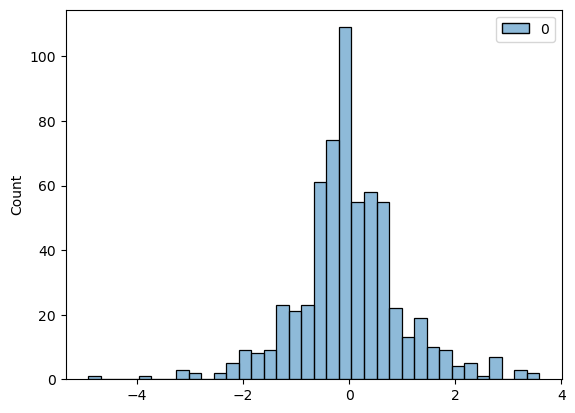

In [51]:
import seaborn as sns
sns.histplot(la_trans)

### Log Transform

In [57]:
import numpy as np
np.log(df['LoanAmount'])
df['LoanAmount']**(2) ##1/2-->square root,1/3--->cube root,3--->cube,2-->square

0      16384.0
1      16384.0
2       4356.0
3      14400.0
4      19881.0
        ...   
609     5041.0
610     1600.0
611    64009.0
612    34969.0
613    17689.0
Name: LoanAmount, Length: 614, dtype: float64

In [58]:
trans=PowerTransformer(method='yeo-johnson')
la_t_trans=trans.fit_transform(df[['Loan_Amount_Term']])
la_t_trans.shape

(614, 1)

In [59]:
print("Skewness:",pd.Series(la_t_trans.reshape(614,)).skew())
print("Kurtosis:",pd.Series(la_t_trans.reshape(614,)).kurtosis())

Skewness: 0.39257134198569293
Kurtosis: 7.077572705226862


In [65]:
np.log(df['Loan_Amount_Term'])
df['Loan_Amount_Term']**(1/2)


0      18.973666
1      18.973666
2      18.973666
3      18.973666
4      18.973666
         ...    
609    18.973666
610    13.416408
611    18.973666
612    18.973666
613    18.973666
Name: Loan_Amount_Term, Length: 614, dtype: float64

<Axes: ylabel='Count'>

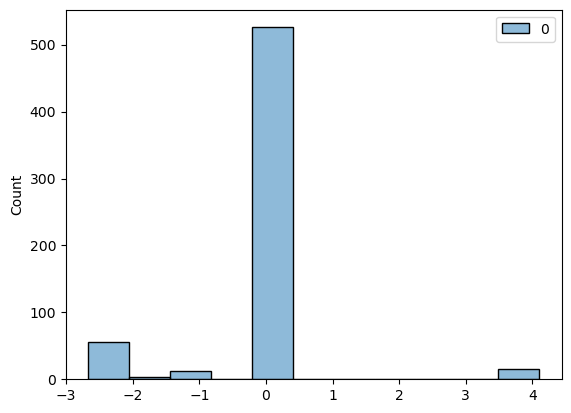

In [66]:
sns.histplot(la_t_trans)

In [61]:
trans=PowerTransformer(method='yeo-johnson')
app_trans=trans.fit_transform(df[['ApplicantIncome']])
app_trans.shape

(614, 1)

In [62]:
print("Skewness:",pd.Series(app_trans.reshape(614,)).skew())
print("Kurtosis:",pd.Series(app_trans.reshape(614,)).kurtosis())


Skewness: -0.09294567889276603
Kurtosis: 4.77062663426899


In [67]:
np.log(df['ApplicantIncome'])
df['ApplicantIncome']**(1/3)


0      18.017473
1      16.610522
2      14.422496
3      13.720654
4      18.171206
         ...    
609    14.260431
610    16.013010
611    20.059821
612    19.646281
613    16.610522
Name: ApplicantIncome, Length: 614, dtype: float64

<Axes: ylabel='Count'>

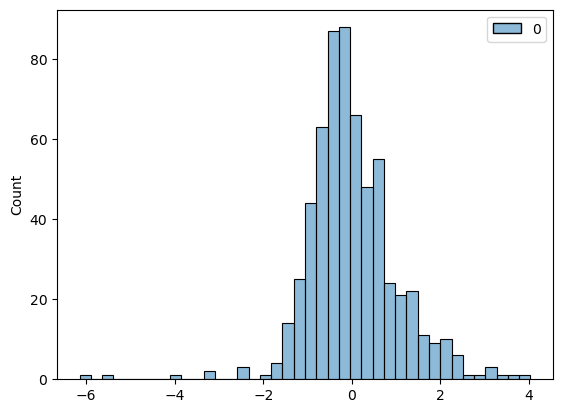

In [68]:
sns.histplot(app_trans)

In [72]:
trans=PowerTransformer(method='yeo-johnson')
co_app_trans=trans.fit_transform(df[['CoapplicantIncome']])
co_app_trans.shape

(614, 1)

In [73]:
print("Skewness:",pd.Series(co_app_trans.reshape(614,)).skew())
print("Kurtosis:",pd.Series(co_app_trans.reshape(614,)).kurtosis())


Skewness: -0.14564645710551902
Kurtosis: -1.8778432766544493


In [75]:
np.log(df['CoapplicantIncome'])
df['CoapplicantIncome']**(3)


0      0.000000e+00
1      3.429289e+09
2      0.000000e+00
3      1.311087e+10
4      0.000000e+00
           ...     
609    0.000000e+00
610    0.000000e+00
611    1.382400e+07
612    0.000000e+00
613    0.000000e+00
Name: CoapplicantIncome, Length: 614, dtype: float64

In [ ]:
sns.histplot(co_app_trans)